In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

#Doing Extra

import pandas as pd

In [4]:
iris = datasets.load_iris() # load the dataset from sklearn library

In [ ]:
iris

In [7]:
type(iris)

sklearn.utils.Bunch

In [40]:
X = iris.data[:, :2] # All rows but only 2 column from the start
y = (iris.target != 0) * 1 #but why did we did this?

In [ ]:
iris.data[:,:2]

In [12]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
(iris.target != 0) * 1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [21]:
X.size

300

In [41]:
y.size

150

In [45]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

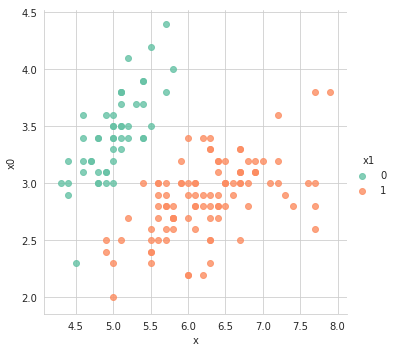

In [53]:
data_iris = pd.DataFrame({'x':X[:,0],'x0':X[:,1],'x1':y})
#fig = plt.figure(figsize=(10,10)) # define plot area
#ax = fig.gca() # define axis 
sns.set_style("whitegrid")

sns.lmplot(x = 'x', y = 'x0',
           data = data_iris,
           hue  = 'x1',
           palette="Set2", fit_reg = False)    

#ax.set_title('KDE plot of auto engine size') # Give the plot a main title
#ax.set_xlabel('Engine Size') # Set text for the x axis
#ax.set_ylabel('Density')# Set text for y axis

# Logistic Regression Implementation

In [72]:
class LogisticRegression:
    def __init__(self, lr=0.01,num_iter=100000,fit_intercept=True,verbose=False):
        self.lr = lr # Learning Rate: The rate at which it learns
        self.num_iter = num_iter # Number of iteration needed.
        self.fit_intercept = fit_intercept#
        self.verbose       = verbose
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0],1))
        return np.concatenate((intercept, X), axis=1)
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def __loss(self, h, y):
        return (-y*np.log(h) - (1-y)*np.log(1-h)).mean()
    def fit(self, X, y):
        if(self.fit_intercept):
            X = self.__add_intercept(X)
            
        self.theta = np.zeros(X.shape[1])
        
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T,(h-y))/ y.size
            self.theta -= self.lr * gradient
            
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            loss = self.__loss(h,y)
            
            if(self.verbose == True and i % 10000 == 0):
                print(f'loss:{loss}\t')
                
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        return self.__sigmoid(np.dot(X, self.theta))
    def predict(self, X):
        return self.predict_prob(X).round()

In [73]:
model = LogisticRegression(lr=0.1, num_iter=300000)

In [74]:
%time model.fit(X, y)

CPU times: user 1min 53s, sys: 11.8 ms, total: 1min 53s
Wall time: 56.8 s


In [75]:
preds = model.predict(X)
(preds == y).mean()

1.0

In [76]:
model.theta

array([-25.89066442,  12.523156  , -13.40150447])

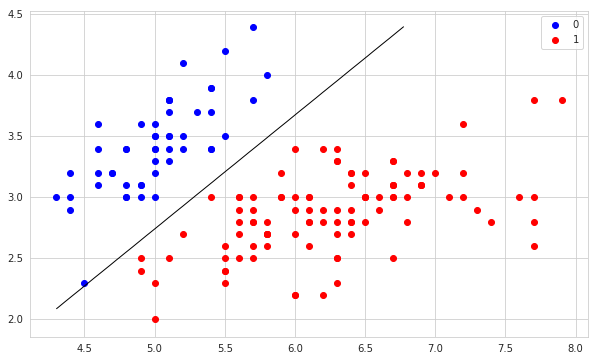

In [77]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend()
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = model.predict_prob(grid).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');

In [78]:
from sklearn.linear_model import LogisticRegression

In [80]:
model = LogisticRegression(C=1e20)

In [81]:
%time model.fit(X,y)

CPU times: user 7.72 ms, sys: 0 ns, total: 7.72 ms
Wall time: 163 ms


/home/harsh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1e+20, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [83]:
preds = model.predict(X)
(preds == y).mean()

1.0

In [84]:
model.intercept_, model.coef_

(array([-80.54201957]), array([[ 31.5951929 , -28.30153825]]))